In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import os


# Handy function to report errors.

def fault(msg):
  raise ValueError(msg)

# Mount the google drive

drive.mount('/gdrive/')

df_topo = pd.read_csv('/gdrive/MyDrive/gaspar_topology_distances.csv')


Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


#Threshold

Component responsible for calculating the threshold.

In [ ]:
df_topo=df_topo.rename(columns={'Unnamed: 0': 'index'})

In [ ]:
len(df_topo.columns)-1

40

In [ ]:
df_dists= df_topo.drop('index',axis=1)

In [ ]:
len(df_dists.values.flatten())

1600

In [ ]:
len(df_dists.columns)

40

Entropy variation according to the order of the variables in the current matrix



In [ ]:
arr = np.array(df_dists.values)

In [ ]:
indices = np.triu_indices(arr.shape[0], k=1)  #Indices of the upper triangular matrix.

In [ ]:
arr = arr[indices] #Upper triangular matrix

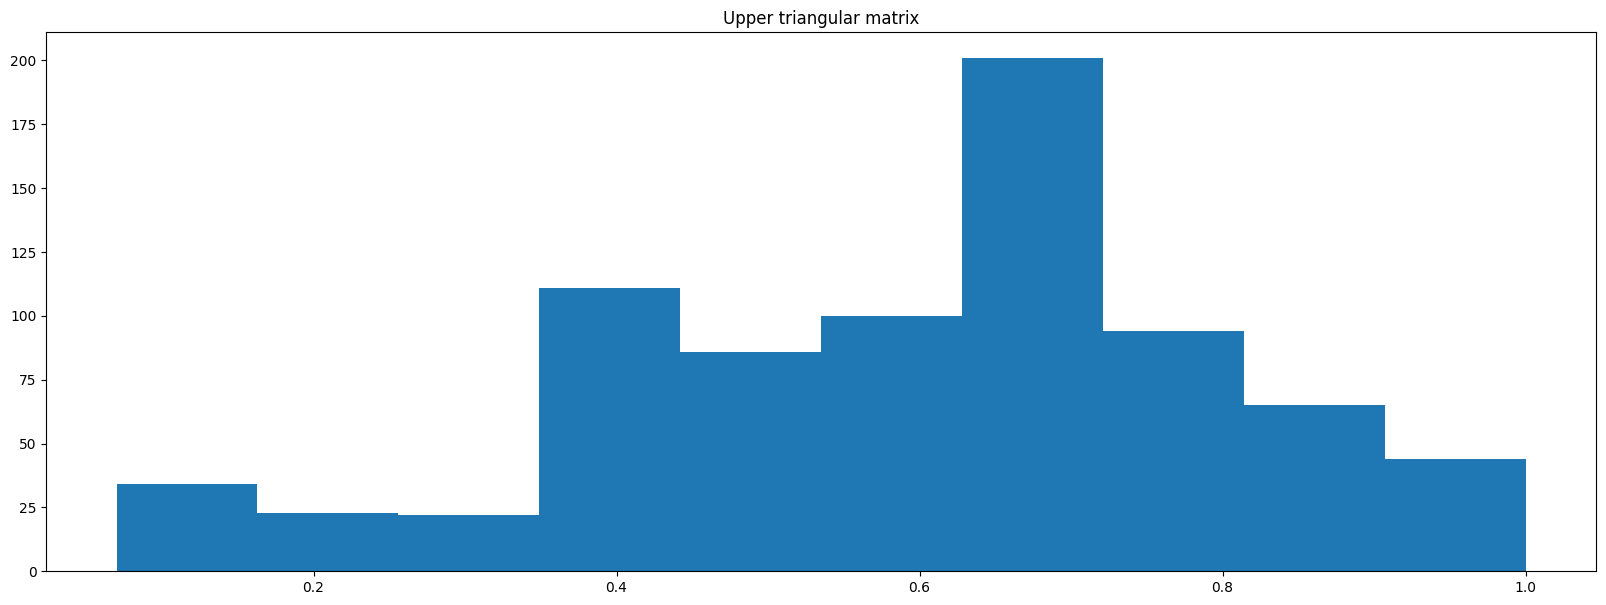

In [ ]:
plt.figure(figsize =(20, 7))
plt.hist(arr)
plt.title("Upper triangular matrix")
plt.show()

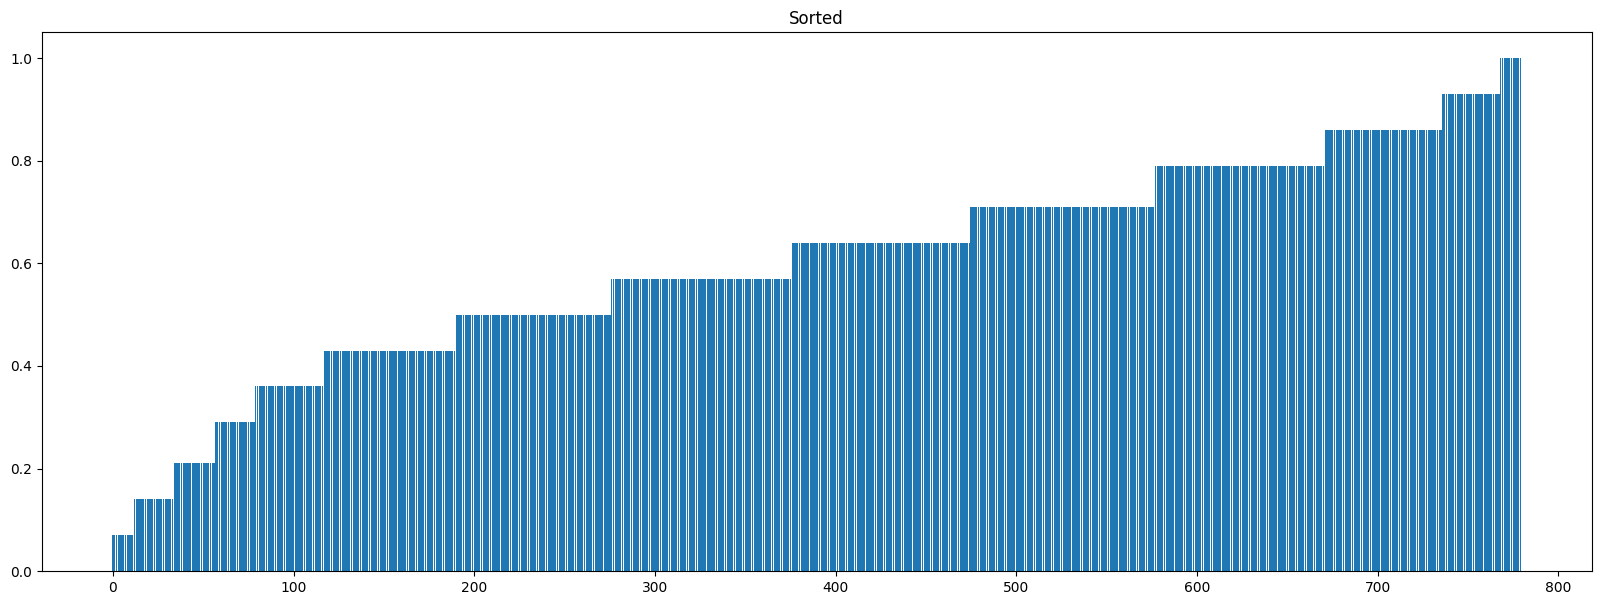

In [ ]:
plt.figure(figsize =(20, 7))
plt.bar(np.arange(len(arr)),np.sort(arr))
plt.title("Sorted")
plt.show()

##Using the h_list to find the threshold

In [ ]:
from scipy.stats import entropy

base=2
H=entropy(arr,base=base)

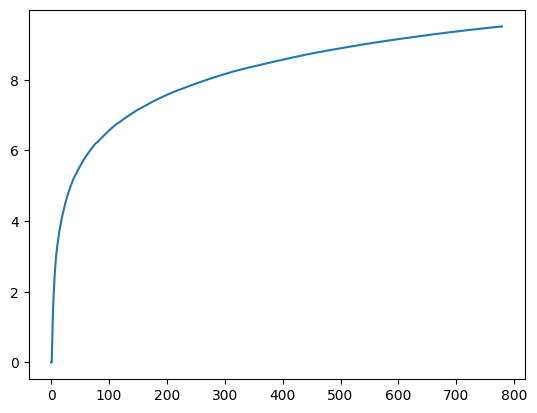

In [ ]:
h_list=[] #Entropy List

for i in range(len(arr)):
  x = arr[:i].copy()
  x = x/np.sum(x)
  H=entropy(x,base=base)
  h_list.append(H)

plt.plot(h_list)

Function to find the threshold

In [ ]:
from numpy import diff

def find_threshold(h_list):
  sort_h_list = np.sort(h_list)
  #dx = 0.1
  dx = h_list[len(h_list)-1]/len(h_list)
  dy = diff(sort_h_list)/dx
  i = np.argmax(dy)
  while(dy[i] > 1):
    i = i + 1
  sort_arr = np.sort(arr)
  plt.plot(dy)
  return sort_arr[i]

##Threshold found

0.29


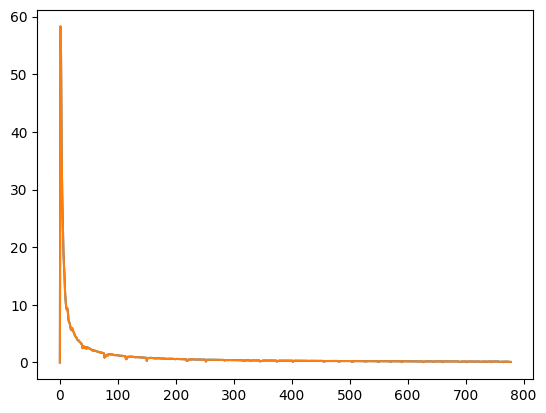

In [ ]:
print(find_threshold(h_list))
topo_threshold = find_threshold(h_list)
#topo_threshold = 0.2

#Distances

Component responsible for calculating the distances.

In [ ]:
df_topo = pd.read_csv('/gdrive/MyDrive/gaspar_topology_distances.csv')

df_topo

,Unnamed: 0,'L1_','L2_','L1','H3','H3_','N','L2','H1','H1_',...,'wf','e','e_','WATS','TTb','TmaxTb','T','Tb1','Tb2','Tb3'
0,'L1_',0.00,0.07,0.29,0.36,0.43,0.43,0.36,0.43,0.43,...,0.79,0.86,0.86,0.71,0.79,0.79,0.71,0.79,0.86,0.86
1,'L2_',0.07,0.00,0.29,0.36,0.43,0.43,0.36,0.43,0.43,...,0.79,0.86,0.86,0.71,0.79,0.79,0.71,0.79,0.86,0.86
2,'L1',0.29,0.29,0.00,0.14,0.21,0.21,0.29,0.36,0.36,...,0.71,0.79,0.79,0.64,0.71,0.71,0.64,0.71,0.79,0.79
3,'H3',0.36,0.36,0.14,0.00,0.14,0.14,0.36,0.43,0.43,...,0.79,0.86,0.86,0.71,0.79,0.79,0.71,0.79,0.86,0.86
4,'H3_',0.43,0.43,0.21,0.14,0.00,0.07,0.43,0.50,0.50,...,0.86,0.93,0.93,0.79,0.86,0.86,0.79,0.86,0.93,0.93
5,'N',0.43,0.43,0.21,0.14,0.07,0.00,0.43,0.50,0.50,...,0.86,0.93,0.93,0.79,0.86,0.86,0.79,0.86,0.93,0.93
6,'L2',0.36,0.36,0.29,0.36,0.43,0.43,0.00,0.14,0.14,...,0.64,0.71,0.71,0.57,0.64,0.64,0.57,0.64,0.71,0.71
7,'H1',0.43,0.43,0.36,0.43,0.50,0.50,0.14,0.00,0.07,...,0.71,0.79,0.79,0.64,0.71,0.71,0.64,0.71,0.79,0.79
8,'H1_',0.43,0.43,0.36,0.43,0.50,0.50,0.14,0.07,0.00,...,0.71,0.79,0.79,0.64,0.71,0.71,0.64,0.71,0.79,0.79
9,'P_',0.36,0.36,0.29,0.36,0.43,0.43,0.21,0.29,0.29,...,0.50,0.57,0.57,0.43,0.50,0.50,0.43,0.50,0.57,0.57


In [ ]:
df_topo_int= df_topo#.drop('Unnamed: 0',axis=1)
df_topo_int = df_topo_int.rename(columns={'Unnamed: 0': 'row name'})

In [ ]:
columns_to_keep = ["'Q'", "'L'", "'T'", "'Power'", "'WATS'", "'TTb'", "'TmaxTb'", "'Shear_max'", "'Ntimes'", "'Pexit'", "'SME'", "'Z_Ztotal'", "'Shear_avg'", "'Visco_avg'", "'Davg_max'", "'NCam'", "'NPec'", "'NBri'", "'Nnam'", "'Qd'", "'Qp'"]

In [ ]:
df=df_topo_int
df = df[df['row name'].isin(columns_to_keep)]
df_topo_int = df
df_topo_int= df_topo_int[['row name',*columns_to_keep]]

In [ ]:
df_topo_int

,row name,'Q','L','T','Power','WATS','TTb','TmaxTb','Shear_max','Ntimes',...,'Z_Ztotal','Shear_avg','Visco_avg','Davg_max','NCam','NPec','NBri','Nnam','Qd','Qp'
10,'NBri',0.21,0.50,0.50,0.43,0.50,0.57,0.57,0.21,0.29,...,0.57,0.21,0.43,0.14,0.50,0.57,0.00,0.50,0.43,0.43
11,'Davg_max',0.29,0.57,0.57,0.50,0.57,0.64,0.64,0.14,0.36,...,0.64,0.14,0.50,0.00,0.57,0.64,0.14,0.57,0.50,0.50
12,'Shear_avg',0.36,0.64,0.64,0.57,0.64,0.71,0.71,0.07,0.43,...,0.71,0.00,0.57,0.14,0.64,0.71,0.21,0.64,0.57,0.57
13,'Shear_max',0.36,0.64,0.64,0.57,0.64,0.71,0.71,0.00,0.43,...,0.71,0.07,0.57,0.14,0.64,0.71,0.21,0.64,0.57,0.57
14,'Q',0.00,0.50,0.50,0.43,0.50,0.57,0.57,0.36,0.14,...,0.57,0.36,0.29,0.29,0.50,0.43,0.21,0.36,0.29,0.29
15,'Ntimes',0.14,0.57,0.57,0.50,0.57,0.64,0.64,0.43,0.00,...,0.64,0.43,0.21,0.36,0.57,0.36,0.29,0.29,0.21,0.21
16,'Qd',0.29,0.71,0.71,0.64,0.71,0.79,0.79,0.57,0.21,...,0.79,0.57,0.21,0.50,0.71,0.36,0.43,0.29,0.00,0.07
17,'Qp',0.29,0.71,0.71,0.64,0.71,0.79,0.79,0.57,0.21,...,0.79,0.57,0.21,0.50,0.71,0.36,0.43,0.29,0.07,0.00
18,'Visco_avg',0.29,0.71,0.71,0.64,0.71,0.79,0.79,0.57,0.21,...,0.79,0.57,0.00,0.50,0.71,0.21,0.43,0.14,0.21,0.21
19,'Nnam',0.36,0.79,0.79,0.71,0.79,0.86,0.86,0.64,0.29,...,0.86,0.64,0.14,0.57,0.79,0.14,0.50,0.00,0.29,0.29


In [ ]:
df_topo_int=df_topo_int.drop('row name',axis=1)

In [ ]:
# get the list of old column names
old_names = df_topo_int.columns.tolist()

# create a list of new column names
dict_name_to_int={}
new_names = []

for i in range(0,len(old_names)):
  new_names.append(i)
  dict_name_to_int[old_names[i]]=i

# rename columns using the new names
df_topo_int = df_topo_int.rename(columns=dict(zip(old_names, new_names)))
df_topo_int

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
10,0.21,0.50,0.50,0.43,0.50,0.57,0.57,0.21,0.29,0.43,...,0.57,0.21,0.43,0.14,0.50,0.57,0.00,0.50,0.43,0.43
11,0.29,0.57,0.57,0.50,0.57,0.64,0.64,0.14,0.36,0.50,...,0.64,0.14,0.50,0.00,0.57,0.64,0.14,0.57,0.50,0.50
12,0.36,0.64,0.64,0.57,0.64,0.71,0.71,0.07,0.43,0.57,...,0.71,0.00,0.57,0.14,0.64,0.71,0.21,0.64,0.57,0.57
13,0.36,0.64,0.64,0.57,0.64,0.71,0.71,0.00,0.43,0.57,...,0.71,0.07,0.57,0.14,0.64,0.71,0.21,0.64,0.57,0.57
14,0.00,0.50,0.50,0.43,0.50,0.57,0.57,0.36,0.14,0.43,...,0.57,0.36,0.29,0.29,0.50,0.43,0.21,0.36,0.29,0.29
15,0.14,0.57,0.57,0.50,0.57,0.64,0.64,0.43,0.00,0.50,...,0.64,0.43,0.21,0.36,0.57,0.36,0.29,0.29,0.21,0.21
16,0.29,0.71,0.71,0.64,0.71,0.79,0.79,0.57,0.21,0.64,...,0.79,0.57,0.21,0.50,0.71,0.36,0.43,0.29,0.00,0.07
17,0.29,0.71,0.71,0.64,0.71,0.79,0.79,0.57,0.21,0.64,...,0.79,0.57,0.21,0.50,0.71,0.36,0.43,0.29,0.07,0.00
18,0.29,0.71,0.71,0.64,0.71,0.79,0.79,0.57,0.21,0.64,...,0.79,0.57,0.00,0.50,0.71,0.21,0.43,0.14,0.21,0.21
19,0.36,0.79,0.79,0.71,0.79,0.86,0.86,0.64,0.29,0.71,...,0.86,0.64,0.14,0.57,0.79,0.14,0.50,0.00,0.29,0.29


In [ ]:
df_topo_int['row name']= list(df_topo_int.columns[:])

In [ ]:
df_topo_int

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,row name
10,0.21,0.50,0.50,0.43,0.50,0.57,0.57,0.21,0.29,0.43,...,0.21,0.43,0.14,0.50,0.57,0.00,0.50,0.43,0.43,0
11,0.29,0.57,0.57,0.50,0.57,0.64,0.64,0.14,0.36,0.50,...,0.14,0.50,0.00,0.57,0.64,0.14,0.57,0.50,0.50,1
12,0.36,0.64,0.64,0.57,0.64,0.71,0.71,0.07,0.43,0.57,...,0.00,0.57,0.14,0.64,0.71,0.21,0.64,0.57,0.57,2
13,0.36,0.64,0.64,0.57,0.64,0.71,0.71,0.00,0.43,0.57,...,0.07,0.57,0.14,0.64,0.71,0.21,0.64,0.57,0.57,3
14,0.00,0.50,0.50,0.43,0.50,0.57,0.57,0.36,0.14,0.43,...,0.36,0.29,0.29,0.50,0.43,0.21,0.36,0.29,0.29,4
15,0.14,0.57,0.57,0.50,0.57,0.64,0.64,0.43,0.00,0.50,...,0.43,0.21,0.36,0.57,0.36,0.29,0.29,0.21,0.21,5
16,0.29,0.71,0.71,0.64,0.71,0.79,0.79,0.57,0.21,0.64,...,0.57,0.21,0.50,0.71,0.36,0.43,0.29,0.00,0.07,6
17,0.29,0.71,0.71,0.64,0.71,0.79,0.79,0.57,0.21,0.64,...,0.57,0.21,0.50,0.71,0.36,0.43,0.29,0.07,0.00,7
18,0.29,0.71,0.71,0.64,0.71,0.79,0.79,0.57,0.21,0.64,...,0.57,0.00,0.50,0.71,0.21,0.43,0.14,0.21,0.21,8
19,0.36,0.79,0.79,0.71,0.79,0.86,0.86,0.64,0.29,0.71,...,0.64,0.14,0.57,0.79,0.14,0.50,0.00,0.29,0.29,9


In [ ]:
edges_set=set()

for index,row in df_topo_int.iterrows():
  #print(index,row)
  column_adjacent= row['row name']
  #print(column_adjacent)
  for i in range(0,20):
    if row[i]<topo_threshold and i!=column_adjacent:
      edges_set.add((int(column_adjacent),i))


edges_set

{(0, 7),
 (0, 12),
 (0, 14),
 (0, 17),
 (1, 7),
 (1, 12),
 (1, 14),
 (1, 17),
 (2, 7),
 (2, 12),
 (2, 14),
 (2, 17),
 (3, 7),
 (3, 12),
 (3, 14),
 (3, 17),
 (4, 0),
 (4, 8),
 (4, 17),
 (5, 0),
 (5, 8),
 (5, 13),
 (5, 19),
 (6, 8),
 (6, 13),
 (6, 19),
 (7, 8),
 (7, 13),
 (7, 19),
 (8, 10),
 (8, 13),
 (8, 16),
 (8, 18),
 (8, 19),
 (9, 10),
 (9, 13),
 (9, 16),
 (9, 18),
 (10, 13),
 (10, 16),
 (10, 18),
 (11, 10),
 (11, 13),
 (11, 16),
 (11, 18),
 (12, 3),
 (12, 9),
 (13, 3),
 (13, 9),
 (14, 1),
 (14, 11),
 (14, 15),
 (15, 1),
 (15, 11),
 (16, 1),
 (16, 15),
 (17, 2),
 (17, 4),
 (17, 5),
 (17, 6),
 (18, 4),
 (18, 5),
 (18, 6),
 (19, 4),
 (19, 5),
 (19, 6),
 (20, 2),
 (20, 4)}

In [ ]:
import networkx as nx
import pandas as pd

# Read in the dataframe

# Create a new graph
G = nx.Graph()
G= nx.from_edgelist(list(edges_set))
# Print the nodes and edges
print('Nodes:', G.nodes())
print('Edges:', G.edges())

Nodes: [4, 0, 14, 1, 3, 7, 5, 13, 19, 6, 17, 8, 18, 10, 2, 12, 15, 11, 16, 20, 9]
Edges: [(4, 0), (4, 18), (4, 20), (4, 8), (4, 17), (4, 19), (0, 14), (0, 17), (0, 5), (0, 7), (0, 12), (14, 1), (14, 2), (14, 15), (14, 11), (14, 3), (1, 12), (1, 16), (1, 15), (1, 17), (1, 7), (3, 7), (3, 12), (3, 17), (3, 13), (7, 13), (7, 19), (7, 2), (7, 8), (5, 13), (5, 19), (5, 17), (5, 8), (5, 18), (13, 9), (13, 11), (13, 6), (13, 10), (13, 8), (19, 6), (19, 8), (6, 17), (6, 8), (6, 18), (17, 2), (8, 18), (8, 10), (8, 16), (18, 10), (18, 9), (18, 11), (10, 9), (10, 11), (10, 16), (2, 12), (2, 20), (12, 9), (15, 11), (15, 16), (11, 16), (16, 9)]


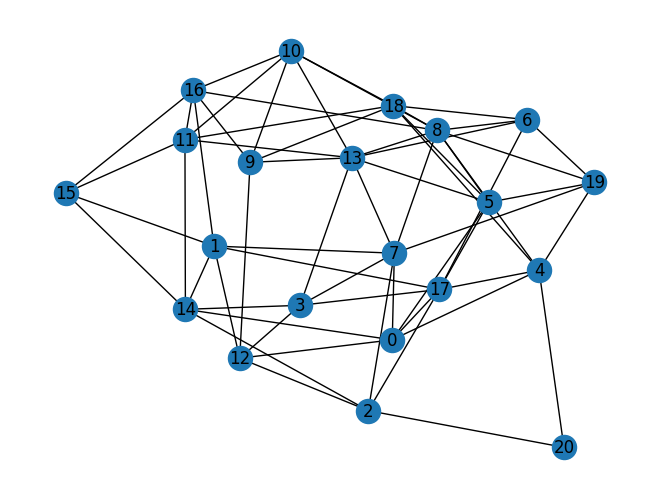

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
A = nx.to_numpy_array(G)

In [ ]:
import networkx as nx
import seaborn as sn

In [ ]:
# Modelo Erdos renyi
numvert = len(G.nodes())
my_rand=G

In [ ]:
# Matriz de Adjacência
A = nx.to_numpy_array(my_rand)

In [ ]:
num_edges = len(my_rand.edges)
num_edges

61

In [ ]:
name_columns= columns_to_keep
print(name_columns)

["'Q'", "'L'", "'T'", "'Power'", "'WATS'", "'TTb'", "'TmaxTb'", "'Shear_max'", "'Ntimes'", "'Pexit'", "'SME'", "'Z_Ztotal'", "'Shear_avg'", "'Visco_avg'", "'Davg_max'", "'NCam'", "'NPec'", "'NBri'", "'Nnam'", "'Qd'", "'Qp'"]


In [ ]:
Sepmat = np.zeros([num_edges,numvert])

In [ ]:
my_rand.edges

EdgeView([(4, 0), (4, 18), (4, 20), (4, 8), (4, 17), (4, 19), (0, 14), (0, 17), (0, 5), (0, 7), (0, 12), (14, 1), (14, 2), (14, 15), (14, 11), (14, 3), (1, 12), (1, 16), (1, 15), (1, 17), (1, 7), (3, 7), (3, 12), (3, 17), (3, 13), (7, 13), (7, 19), (7, 2), (7, 8), (5, 13), (5, 19), (5, 17), (5, 8), (5, 18), (13, 9), (13, 11), (13, 6), (13, 10), (13, 8), (19, 6), (19, 8), (6, 17), (6, 8), (6, 18), (17, 2), (8, 18), (8, 10), (8, 16), (18, 10), (18, 9), (18, 11), (10, 9), (10, 11), (10, 16), (2, 12), (2, 20), (12, 9), (15, 11), (15, 16), (11, 16), (16, 9)])

In [ ]:
j = 0
for i in my_rand.edges:
     if j>=30:
       break
     init = i[0]
     fim = i[1]
     if fim>=30:
       break
     Sepmat[j,init] = 1
     Sepmat[j,fim] = 1

     j = j + 1

In [ ]:
!pip install gurobipy
import gurobipy as gp
from gurobipy import GRB

In [ ]:
ncols=A.shape[1]
ncols

21

In [ ]:
# Modelagem pelo gurobipy
m = gp.Model("graph1")
# Create variables (binary)
x = m.addMVar(shape=ncols, vtype=GRB.BINARY, name="x")

In [ ]:
#Função Objetiva
obj=np.ones(ncols)

In [ ]:
rhs1 = np.ones(A.shape[0])
rhs2 = np.ones(Sepmat.shape[0])

In [ ]:
# Minimize subject to constraints
# Conjunto Independente Dominante
m.setObjective(obj @ x,GRB.MINIMIZE)
m.addConstr((A + np.eye(ncols) )@ x >= rhs1) # Conjunto Dominante
m.addConstr(Sepmat@x <= rhs2 ) # Conjunto Independente

<MConstr (61,) *awaiting model update*>

In [ ]:
m.setParam(GRB.Param.PoolSearchMode, 2)
m.setParam(GRB.Param.PoolGap, 0.05)
m.setParam(GRB.Param.PoolSolutions, 20) # 20 Soluções

Set parameter PoolSearchMode to value 2
Set parameter PoolGap to value 0.05
Set parameter PoolSolutions to value 20


In [ ]:
m.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 82 rows, 21 columns and 203 nonzeros
Model fingerprint: 0x223e9b7f
Variable types: 0 continuous, 21 integer (21 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 5.0000000
Presolve removed 38 rows and 0 columns
Presolve time: 0.00s
Presolved: 44 rows, 21 columns, 184 nonzeros
Variable types: 0 continuous, 21 integer (21 binary)

Root relaxation: objective 3.166667e+00, 16 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    3.16667    0    8    5.000

In [ ]:
assert m.Status == GRB.Status.OPTIMAL # Solução Válida

In [ ]:
nSolutions = m.SolCount
print('Number of solutions found: ' + str(nSolutions))

Number of solutions found: 9


In [ ]:
for e in range(nSolutions):
        m.setParam(GRB.Param.SolutionNumber, e)
        print("Weight ",'%g ' % m.PoolObjVal)
print('\n')

Weight  4 
Weight  4 
Weight  4 
Weight  4 
Weight  4 
Weight  4 
Weight  4 
Weight  4 
Weight  4 




In [ ]:
allsols=[]

In [ ]:
for i in range(nSolutions):
     currentsol=[]
     m.setParam(GRB.Param.SolutionNumber, i)
     for e in range(ncols):
       if(x[e].Xn > 0.9):
        currentsol.append(e)
     allsols.append(currentsol)

In [ ]:
names_matrix = [[name_columns[i] for i in row] for row in allsols]

df = pd.DataFrame(names_matrix)

#Selection

Module for selecting potential candidates.

In [ ]:
df

,0,1,2,3
0,'TmaxTb','SME','Davg_max','Nnam'
1,'Q','T','Ntimes','Qp'
2,'Q','T','Z_Ztotal','Qp'
3,'Pexit','SME','Davg_max','Nnam'
4,'TTb','Shear_avg','Davg_max','NBri'
5,'TTb','Shear_avg','Davg_max','Nnam'
6,'TTb','Shear_avg','Davg_max','NPec'
7,'Q','T','Z_Ztotal','NCam'
8,'Q','Z_Ztotal','NCam','NPec'


##Module responsible for generating Hamming distance tables

In [ ]:
#Function to calculate the Hamming distance between two rows
def hamming_distance(row1, row2):
    distance = 0
    for i in range(len(row1)):
            if pd.notna(row1[i]) and pd.notna(row2[i]) and row1[i] != row2[i]:
                distance += 1
    return distance

#Distance table
distances = pd.DataFrame(columns=df.index, index=df.index)

# Calculation of Hamming distances
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        distances.loc[i, j] = hamming_distance(row1, row2)

distances


,0,1,2,3,4,5,6,7,8
0,0,4,4,1,3,2,3,4,4
1,4,0,1,4,4,4,4,2,3
2,4,1,0,4,4,4,4,1,3
3,1,4,4,0,3,2,3,4,4
4,3,4,4,3,0,1,1,4,4
5,2,4,4,2,1,0,1,4,4
6,3,4,4,3,1,1,0,4,3
7,4,2,1,4,4,4,4,0,3
8,4,3,3,4,4,4,3,3,0


In [ ]:
!pip install toytree

In [ ]:
import toytree

In [ ]:
pip install biotite

##Module responsible for applying the Neighbor Joining algorithm to the distance array

In [ ]:
import biotite.sequence.phylo as bio

distances_array = np.array(distances.values, dtype=int)


tree = bio.neighbor_joining(distances_array) #Applying the Neighbor Joining algorithm to the distance array

newick = tree.to_newick(include_distance=False)

tree = toytree.tree(newick)

tree.draw(height=600, width=1000, node_hover=True, node_sizes=10, scale_root=True, use_edge_lengths=True)

unrecognized arguments skipped: ['scale_root']
check the docs, argument names may have changed.


(<toyplot.canvas.Canvas at 0x78bbf068ee00>,
 <toytree.Render.ToytreeMark at 0x78bbf068ef50>)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="1000.0px" height="600.0px" viewBox="0 0 1000.0 600.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tb34f74dc0b5f4b41af5dc56d17cab9d4"> idx: 0
dist: 1.0000
support: 0.0000
height: 0.0000
name: 1 idx: 1
dist: 1.0000
support: 0.0000
height: 0.0000
name: 2 idx: 2
dist: 1.0000
support: 0.0000
height: 1.0000
name: 7 idx: 3
dist: 1.0000
support: 0.0000
height: 2.0000
name: 8 idx: 4
dist: 1.0000
support: 0.0000
height: 2.0000
name: 0 idx: 5
dist: 1.0000
support: 0.0000
height: 2.0000
name: 3 idx: 6
dist: 1.0000
support: 0.0000
height: 3.0000
name: 4 idx: 7
dist: 1.0000
support: 0.0000
height: 3.0000
name: 6 idx: 8
dist: 1.0000
support: 0.0000
height: 4.0000
name: 5 idx: 9
dist: 1.0000
support: 0.0000
height: 1.0000
name: 9 idx: 10
dist: 1.0000
support: 0.0000
height: 2.0000
name: 10 idx: 11
dist: 1.0000
support: 0.0000
height: 3.0000
name: 11 idx: 12
dist: 1.0000
support: 0.0000
height: 3.0000
name: 12 idx: 13
dist: 1.0000
support: 0.0000
height: 4.0000
name: 13 idx: 14
dist: 1.0000
support: 0.0000
height: 4.0000
name: 14 idx: 15
dist: 1.0000
support: 0.0000
height: 5.0000
name: 15 1 2 7 8 0 3 4 6 5

In [ ]:
pip install ete3

Generating the topological distance table

In [ ]:
from ete3 import Tree

mTree = []

mTree = [ Tree(newick) ]


In [ ]:
from itertools import combinations, combinations_with_replacement

targetcomb = [ (t1.name, t2.name) for t1, t2 in combinations_with_replacement(mTree[0].get_leaves(),2) ]

labels = [ l.name for l in mTree[0].get_leaves() ]

topology_dist = dict()

for t1, t2 in targetcomb:
  if t1 == t2:
    d = 0
  else:
    d = mTree[0].get_distance(target=t1, target2=t2, topology_only=True) #constrained to tree topology
  try:
    topology_dist[t1] += [ d ]
  except:
    topology_dist[t1] =  [ d ]
  if t1 != t2:
    try:
      topology_dist[t2] += [ d ]
    except:
      topology_dist[t2] = [ d ]

In [ ]:

labels = topology_dist.keys()
result = topology_dist.values()
data = list(result)
np_topology_dist = np.array(data)


topology = pd.DataFrame(np_topology_dist)

topology

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,2.0,4.0,5.0,6.0,6.0,4.0,4.0
1,1.0,0.0,2.0,4.0,5.0,6.0,6.0,4.0,4.0
2,2.0,2.0,0.0,3.0,4.0,5.0,5.0,3.0,3.0
3,4.0,4.0,3.0,0.0,2.0,3.0,3.0,3.0,3.0
4,5.0,5.0,4.0,2.0,0.0,2.0,2.0,4.0,4.0
5,6.0,6.0,5.0,3.0,2.0,0.0,1.0,5.0,5.0
6,6.0,6.0,5.0,3.0,2.0,1.0,0.0,5.0,5.0
7,4.0,4.0,3.0,3.0,4.0,5.0,5.0,0.0,1.0
8,4.0,4.0,3.0,3.0,4.0,5.0,5.0,1.0,0.0


In [ ]:

tree = bio.neighbor_joining(np_topology_dist) #Applying the Neighbor Joining algorithm to the topological distance array

newick = tree.to_newick(include_distance=True)

tree = toytree.tree(newick)
tree.draw(height=600, width=1000, node_hover=True, node_sizes=10, scale_root=True, use_edge_lengths=True)
tree.draw(height=600, width=1000, node_hover=True, node_sizes=10, scale_root=True, use_edge_lengths=False)

unrecognized arguments skipped: ['scale_root']
check the docs, argument names may have changed.
unrecognized arguments skipped: ['scale_root']
check the docs, argument names may have changed.


(<toyplot.canvas.Canvas at 0x78bbf0e80070>,
 <toytree.Render.ToytreeMark at 0x78bbf0e82800>)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="1000.0px" height="600.0px" viewBox="0 0 1000.0 600.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="td13552dd4fe2419aa32cf03718e75066"> idx: 0
dist: 0.5000
support: 0.0000
height: 0.0000
name: 5 idx: 1
dist: 0.5000
support: 0.0000
height: 0.0000
name: 6 idx: 2
dist: 0.5000
support: 0.0000
height: 1.0000
name: 4 idx: 3
dist: 0.5000
support: 0.0000
height: 2.0000
name: 3 idx: 4
dist: 0.5000
support: 0.0000
height: 1.0000
name: 0 idx: 5
dist: 0.5000
support: 0.0000
height: 1.0000
name: 1 idx: 6
dist: 0.5000
support: 0.0000
height: 2.0000
name: 2 idx: 7
dist: 0.5000
support: 0.0000
height: 4.0000
name: 8 idx: 8
dist: 0.5000
support: 0.0000
height: 4.0000
name: 7 idx: 9
dist: 1.0000
support: 0.0000
height: 0.5000
name: 9 idx: 10
dist: 1.0000
support: 0.0000
height: 1.5000
name: 10 idx: 11
dist: 1.0000
support: 0.0000
height: 1.5000
name: 11 idx: 12
dist: 1.0000
support: 0.0000
height: 2.5000
name: 12 idx: 13
dist: 1.0000
support: 0.0000
height: 2.5000
name: 13 idx: 14
dist: 1.0000
support: 0.0000
height: 3.5000
name: 14 idx: 15
dist: 0.0000
support: 0.0000
height: 4.5000
name: 15 5 6 4 3 0 1 2 8 7

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="1000.0px" height="600.0px" viewBox="0 0 1000.0 600.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t5e0ab5dedf844f659a053e078c4dede0"> idx: 0
dist: 0.5000
support: 0.0000
height: 0.0000
name: 5 idx: 1
dist: 0.5000
support: 0.0000
height: 0.0000
name: 6 idx: 2
dist: 0.5000
support: 0.0000
height: 1.0000
name: 4 idx: 3
dist: 0.5000
support: 0.0000
height: 2.0000
name: 3 idx: 4
dist: 0.5000
support: 0.0000
height: 1.0000
name: 0 idx: 5
dist: 0.5000
support: 0.0000
height: 1.0000
name: 1 idx: 6
dist: 0.5000
support: 0.0000
height: 2.0000
name: 2 idx: 7
dist: 0.5000
support: 0.0000
height: 4.0000
name: 8 idx: 8
dist: 0.5000
support: 0.0000
height: 4.0000
name: 7 idx: 9
dist: 1.0000
support: 0.0000
height: 0.5000
name: 9 idx: 10
dist: 1.0000
support: 0.0000
height: 1.5000
name: 10 idx: 11
dist: 1.0000
support: 0.0000
height: 1.5000
name: 11 idx: 12
dist: 1.0000
support: 0.0000
height: 2.5000
name: 12 idx: 13
dist: 1.0000
support: 0.0000
height: 2.5000
name: 13 idx: 14
dist: 1.0000
support: 0.0000
height: 3.5000
name: 14 idx: 15
dist: 0.0000
support: 0.0000
height: 4.5000
name: 15 5 6 4 3 0 1 2 8 7

##Module responsible for selecting the best candidates.

In [ ]:
from numpy.core.multiarray import where
import numpy as np

position = np.arange(len(np_topology_dist))

def selections(matrix, index, position):
    while np.any(matrix == index):
        # Finding indices of pairs with value X
        indices = np.where(matrix == index)
        rows = indices[0]
        columns = indices[1]

        # Calculating row sums for the pairs
        row_sums = np.sum(matrix[rows], axis=1)

        # Finding the index of the row with the smallest sum
        index_of_min_sum = np.argmin(row_sums)

        # Removing the row and column with value X from the pair with the smallest sum
        row_column_to_remove = rows[index_of_min_sum]
        matrix = np.delete(matrix, row_column_to_remove, axis=0)
        matrix = np.delete(matrix, row_column_to_remove, axis=1)
        position = np.delete(position, row_column_to_remove)

    return matrix, position



#TODO
r_matrix, p = selections(np_topology_dist, 1.0, position)
print("Resulting matrix:")
print(r_matrix,"\n")
print("Resulting rows:")
print(p,"\n")
result2 = df.loc[p]
print(result2)
print("===================\n")

i = 2
while (len(p) > 1):
  r_matrix, p = selections(r_matrix, i, p)
  print("Resulting matrix:")
  print(r_matrix,"\n")
  print("Resulting rows:")
  print(p,"\n")
  i += 1
  result = df.loc[p]
  print(result)
  print("===================\n")

result

Resulting matrix:
[[0. 2. 4. 5. 6. 4.]
 [2. 0. 3. 4. 5. 3.]
 [4. 3. 0. 2. 3. 3.]
 [5. 4. 2. 0. 2. 4.]
 [6. 5. 3. 2. 0. 5.]
 [4. 3. 3. 4. 5. 0.]] 

Resulting rows:
[1 2 3 4 6 8] 

         0            1           2       3
1      'Q'          'T'    'Ntimes'    'Qp'
2      'Q'          'T'  'Z_Ztotal'    'Qp'
3  'Pexit'        'SME'  'Davg_max'  'Nnam'
4    'TTb'  'Shear_avg'  'Davg_max'  'NBri'
6    'TTb'  'Shear_avg'  'Davg_max'  'NPec'
8      'Q'   'Z_Ztotal'      'NCam'  'NPec'

Resulting matrix:
[[0. 6. 4.]
 [6. 0. 5.]
 [4. 5. 0.]] 

Resulting rows:
[1 6 8] 

       0            1           2       3
1    'Q'          'T'    'Ntimes'    'Qp'
6  'TTb'  'Shear_avg'  'Davg_max'  'NPec'
8    'Q'   'Z_Ztotal'      'NCam'  'NPec'

Resulting matrix:
[[0. 6. 4.]
 [6. 0. 5.]
 [4. 5. 0.]] 

Resulting rows:
[1 6 8] 

       0            1           2       3
1    'Q'          'T'    'Ntimes'    'Qp'
6  'TTb'  'Shear_avg'  'Davg_max'  'NPec'
8    'Q'   'Z_Ztotal'      'NCam'  'NPec'

Resultin

,0,1,2,3
6,'TTb','Shear_avg','Davg_max','NPec'
